In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve
)

# Load data
df = pd.read_csv("final_matrix.csv")
X = df.drop(columns=["status"])
y = df["status"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)



 Model: XGBoost


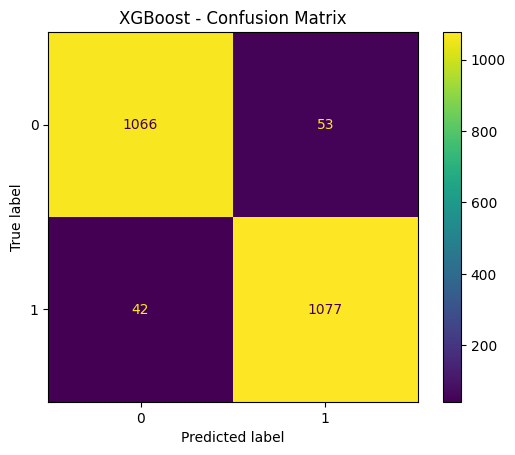

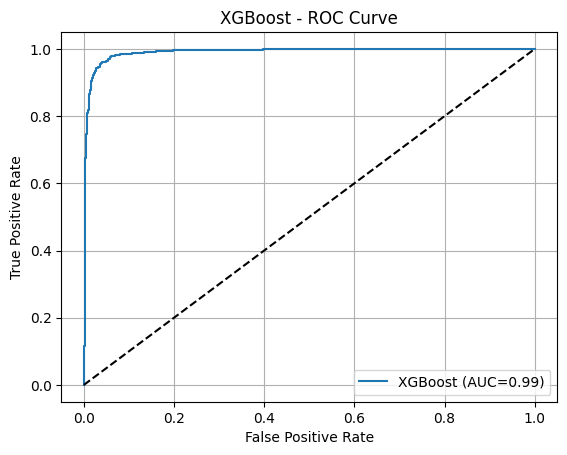

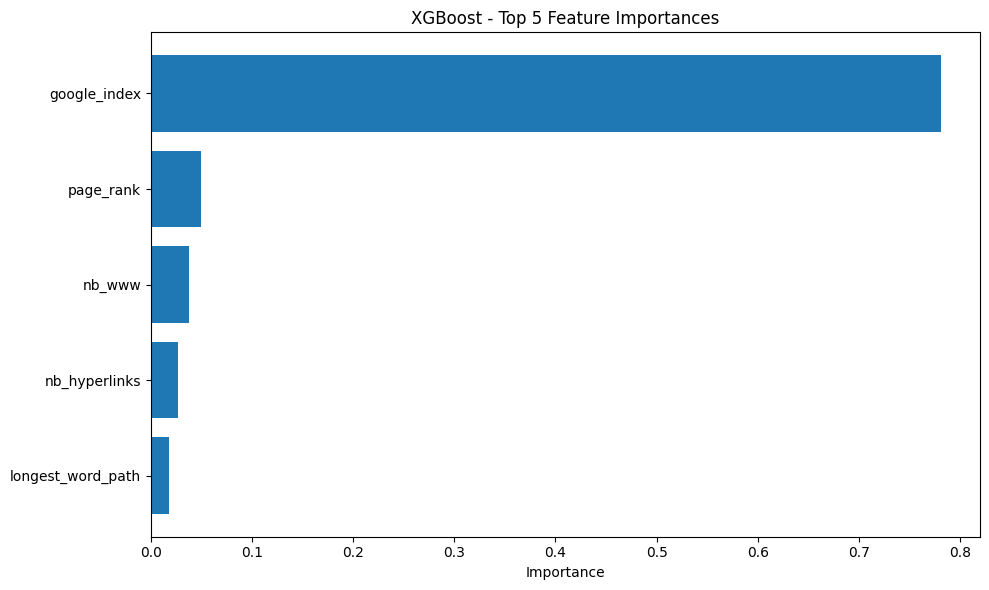

 Evaluation for XGBoost:
Time: 0.2329 sec
Accuracy: 0.9576
Precision: 0.9531
Recall: 0.9625
F1 Score: 0.9578
ROC AUC: 0.9902

 Model: Logistic Regression


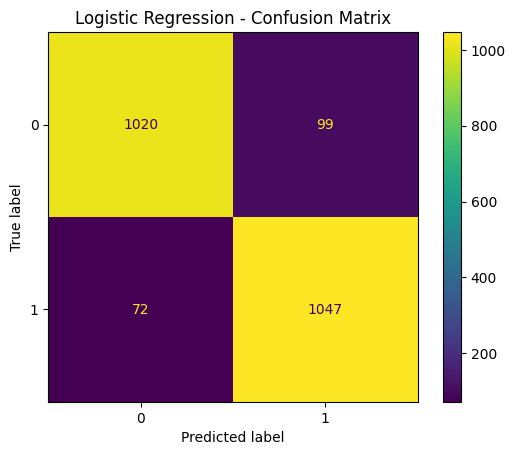

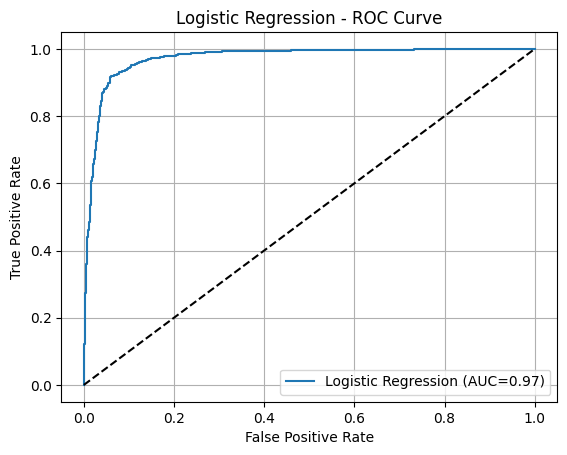

 Evaluation for Logistic Regression:
Time: 0.0243 sec
Accuracy: 0.9236
Precision: 0.9136
Recall: 0.9357
F1 Score: 0.9245
ROC AUC: 0.9717

 Model: Decision Tree


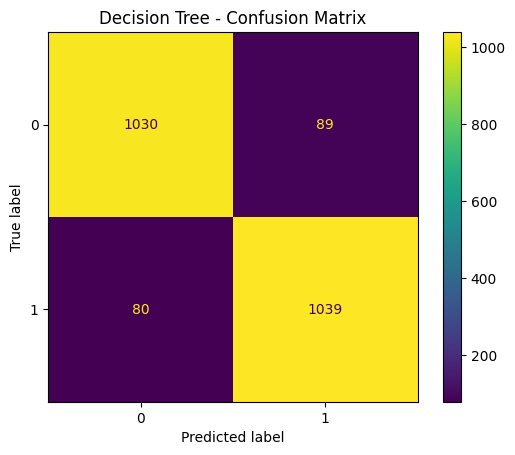

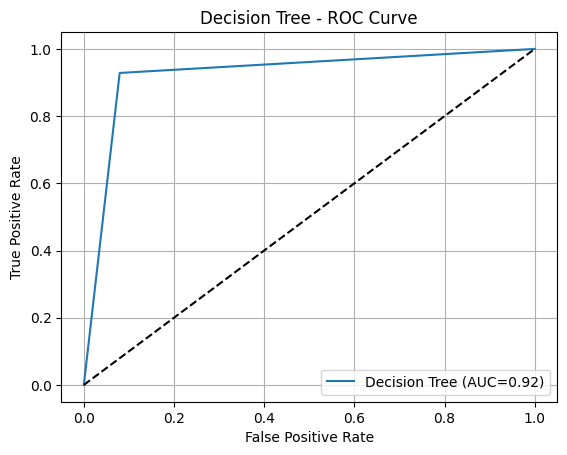

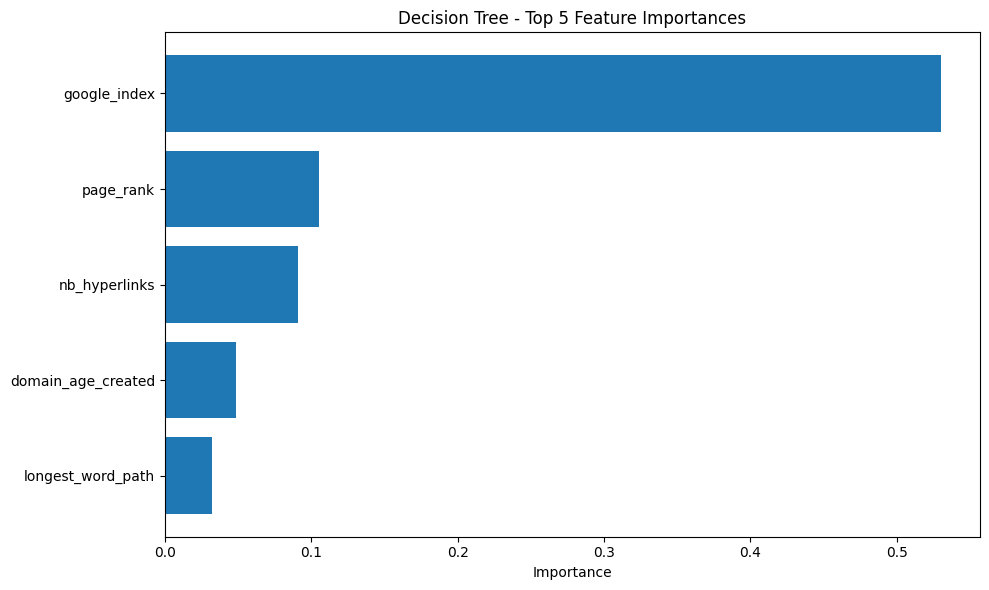

 Evaluation for Decision Tree:
Time: 0.0613 sec
Accuracy: 0.9245
Precision: 0.9211
Recall: 0.9285
F1 Score: 0.9248
ROC AUC: 0.9245

 Model: KNN


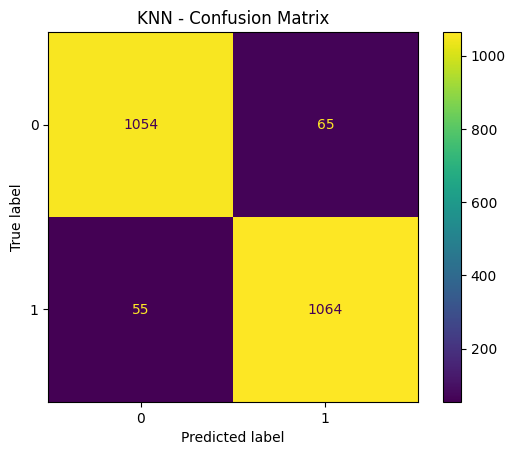

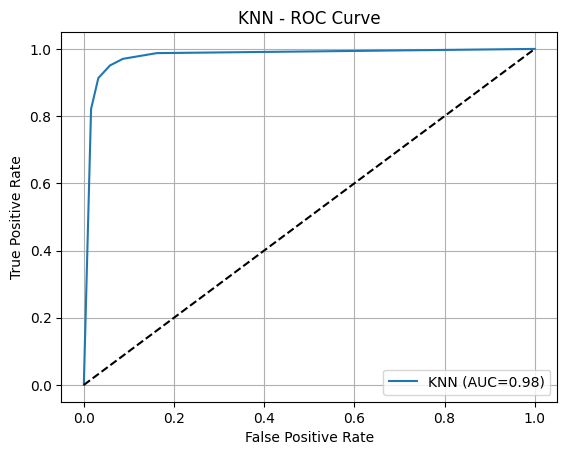

 Evaluation for KNN:
Time: 0.2770 sec
Accuracy: 0.9464
Precision: 0.9424
Recall: 0.9508
F1 Score: 0.9466
ROC AUC: 0.9787


In [2]:

models = {
    'XGBoost': XGBClassifier(eval_metric='logloss'),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier()
}

results = {}
roc_data = {}

for name, model in models.items():
    print(f"\n Model: {name}")
    start = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    end = time.time()
    elapsed = end - start
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    results[name] = {
        'Time': elapsed,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'ROC AUC': auc
    }

    # Confusion Matrix
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_data[name] = (fpr, tpr, auc)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"{name} - ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Feature Importance (if available)
    if hasattr(model, "feature_importances_"):
        import numpy as np
    
        importances = model.feature_importances_
        feature_names = X.columns if hasattr(X, "columns") else [f"f{i}" for i in range(X.shape[1])]
    
        # Top 5 Features
        top_indices = np.argsort(importances)[::-1][:5]
        top_features = [feature_names[i] for i in top_indices]
        top_importances = importances[top_indices]
    
        plt.figure(figsize=(10, 6))
        plt.barh(range(5), top_importances[::-1])
        plt.yticks(range(5), top_features[::-1])
        plt.xlabel("Importance")
        plt.title(f"{name} - Top 5 Feature Importances")
        plt.tight_layout()
        plt.show()


    # Evaluation Summary
    print(f" Evaluation for {name}:")
    print(f"Time: {elapsed:.4f} sec")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {auc:.4f}")


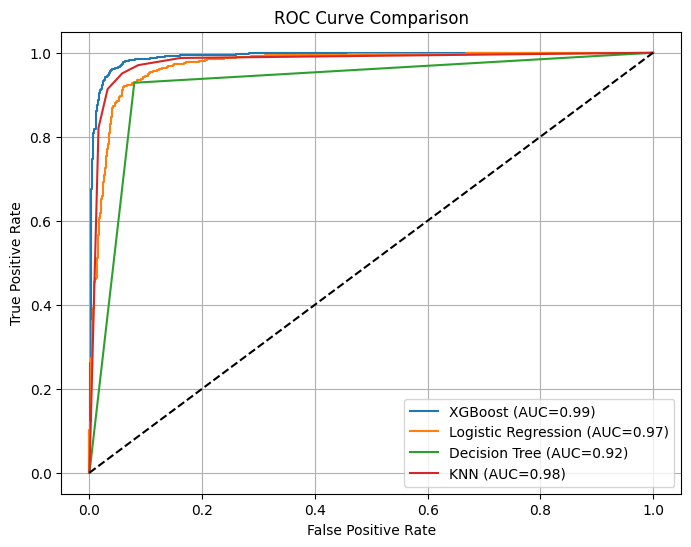

In [3]:

# Combined ROC Curve
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


In [4]:

# Summary Table
df_result = pd.DataFrame(results).T
df_result


,Time,Accuracy,Precision,Recall,F1 Score,ROC AUC
XGBoost,0.232913,0.957551,0.953097,0.962466,0.957759,0.990205
Logistic Regression,0.024326,0.923592,0.913613,0.935657,0.924503,0.971727
Decision Tree,0.061279,0.924486,0.921099,0.928508,0.924789,0.924486
KNN,0.277038,0.946381,0.942427,0.950849,0.946619,0.978680
